# Data Preprocessing and EDA

We will import and analyse the data, then we will process the sata to find the outliers and correlations and finnal do the EDA.

Authors:
- Nooruddin Shaikh
- Milind Sai
- Saurabh Jejurkar
- Kartik Bhargav

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import create_report #"pip install dataprep" to install the library
%matplotlib inline

In [48]:
df = pd.read_csv("Data/city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


DataPrep Report
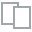
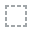
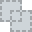
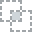
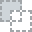
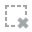
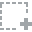
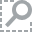
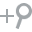
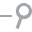
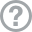
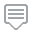
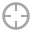
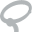
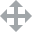
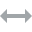
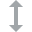
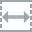
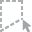
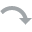
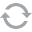
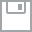
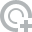
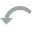
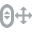
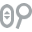
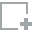
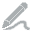
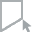
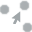
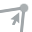
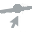

In [69]:
#The below report is saved as "1. Processing and EDA Report.html"
#Kindly open that in any browser if the report is not rendering here.
create_report(df)

## Insights:
- Most of the countries including India calculates AQI based on Particulate Matter 2.5 (or PM10), Nitrogen Dioxide (NO2), Carbon Mono-oxide (CO), Sulphur Di-oxide (SO2) and Ozone (O3).
- PM10, Benzene, Xylene, Toulene are some of the columns which has high NaN values. Also most of the cities doesn't calculate these parameter so dropping them will be better option and so we will consider only necessary parameters which are calculated by all the cities.
- If we see the Minimum, Mean and Maximum values of any of the columns, we can see data is much skewed and outlier exixts, so handling them should be considered.
- Our target variable is AQI (from AQI we can calculate the AQI Bucket) and from above correlation graph we can see PM2.5 has high correaltion.

In [50]:
df.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.846498,0.433491,0.350709,0.436792,0.275086,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,0.659181
PM10,0.846498,1.000000,0.502349,0.464380,0.527768,0.376816,0.112588,0.256974,0.244919,0.022265,0.169335,0.081700,0.803313
NO,0.433491,0.502349,1.000000,0.478070,0.794890,0.185621,0.212607,0.170322,0.014580,0.035771,0.150857,0.094237,0.452191
NO2,0.350709,0.464380,0.478070,1.000000,0.627627,0.234938,0.356521,0.392233,0.293349,0.025260,0.273926,0.171701,0.537071
NOx,0.436792,0.527768,0.794890,0.627627,1.000000,0.166224,0.226992,0.238397,0.093170,0.039121,0.189386,0.087398,0.486450
NH3,0.275086,0.376816,0.185621,0.234938,0.166224,1.000000,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,0.252019
CO,0.089912,0.112588,0.212607,0.356521,0.226992,0.104891,1.000000,0.489697,0.041736,0.061861,0.277904,0.154889,0.683346
SO2,0.132325,0.256974,0.170322,0.392233,0.238397,-0.038998,0.489697,1.000000,0.162142,0.036110,0.296139,0.251195,0.490586
O3,0.161238,0.244919,0.014580,0.293349,0.093170,0.094972,0.041736,0.162142,1.000000,0.020255,0.130209,0.111410,0.198991
Benzene,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,1.000000,0.739286,0.415427,0.044407


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Data Cleaning and Processing

After analysis, we can select only necessary columns (which is calculated by most of the cities in India). <br>
- City is removed since it's not necessary
- Date is removed since AQI is not dependent on date
- NO and Nox is removed since we have considered No2 which is subsidary os Nox
- Benzene, Toluene, Xylene is removed since only major cities consider these paramater while calculating AQI while our model is for whole country so removing them will be better option for any type of city person.
- AQI Bucket is removed since it is categorical data and AQI Bucket can be calculated using AQI values by simple formula.

The reason for dropping PM10 is because
- We are considering PM2.5, so PM2.5 and PM10 contribute almost the same data, so considering both will make model too dependent on these features.
- Also PM10 has high NaN values(almost 35% of the data is NaN)
- Dropping one or the other will not affect the AQI since PM2.5 and PM10 delivers almost same information.
- Since VIF value of PM10 is high and To avoid multicollinerity problem, we can drop PM10

In [52]:
df.drop(["City", "PM10", "Date","NO","NOx","NH3", "Benzene", "Toluene", "Xylene","AQI_Bucket"], axis=1, inplace=True)

In [53]:
#Calculating NaN Values
df.isna().sum()

PM2.5    4598
NO2      3585
CO       2059
SO2      3854
O3       4022
AQI      4681
dtype: int64

In [54]:
# Dropping NaN values will be better since Mean, Median and Mode is not a perfect parameter for every columns
df = df.dropna().reset_index(drop=True)

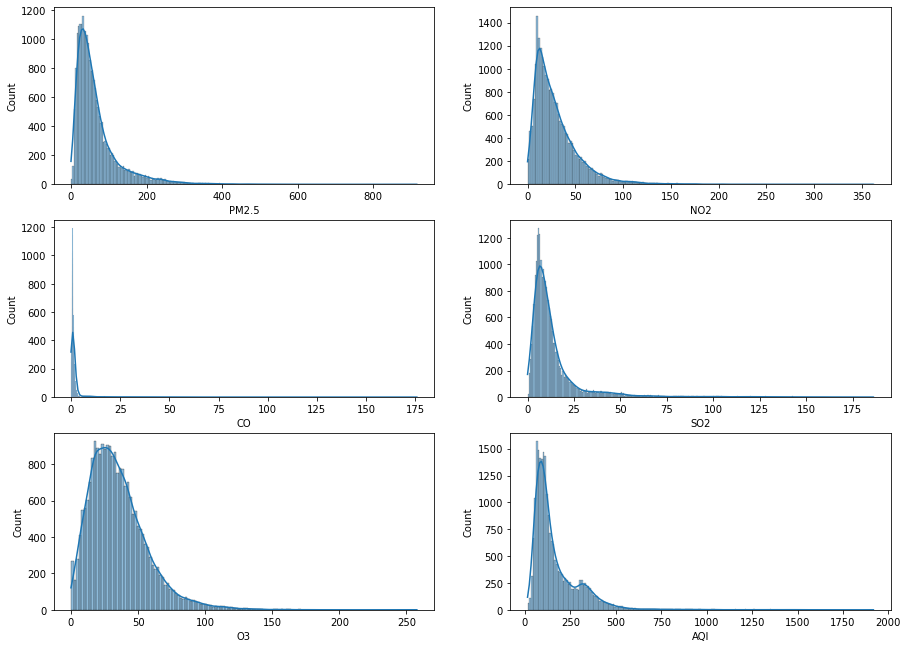

In [55]:
#Checking Data Distribution
plt.figure(figsize=(15,15))
for i in range(1,df.shape[1]+1):
    plt.subplot(4,2,i)
    sns.histplot(data=df[df.columns[i-1]],kde=True)

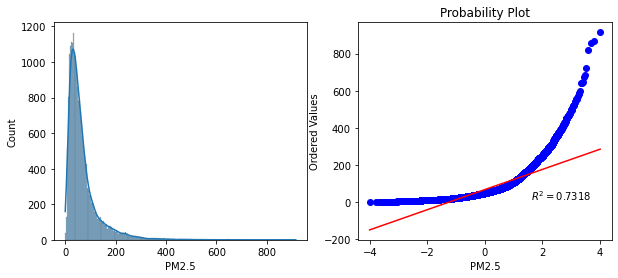

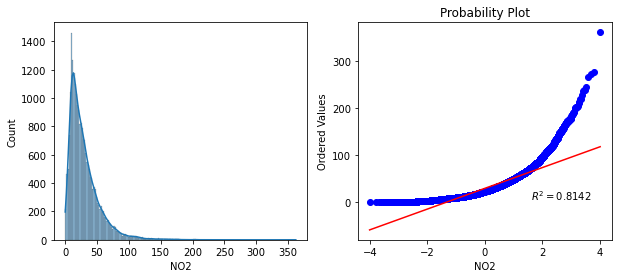

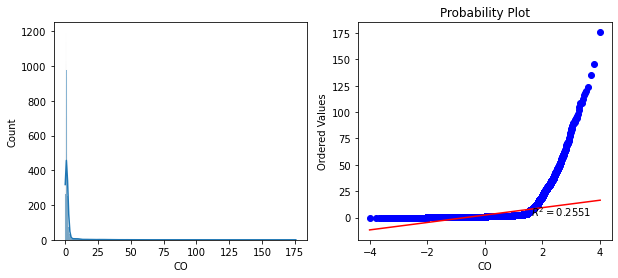

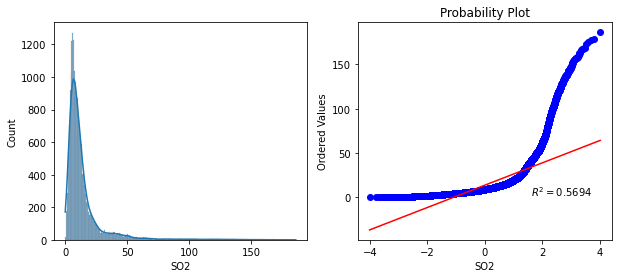

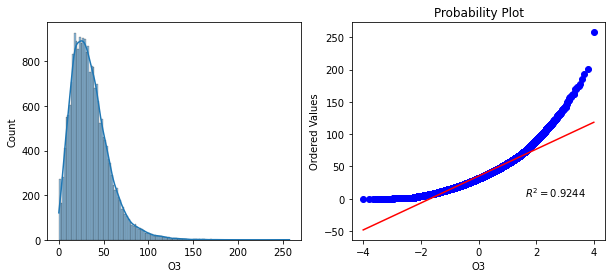

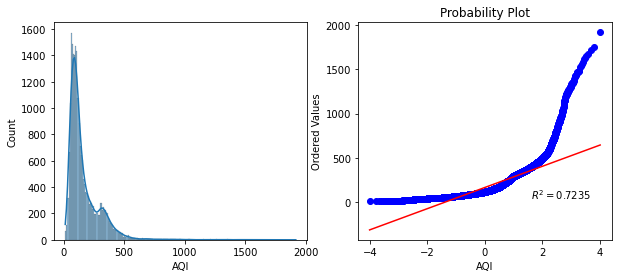

In [56]:
#Using QQ Plot
from scipy import stats
from scipy.stats import norm

columns=df.columns.to_list()

def QQplot(df,variable):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[variable],kde=True)
    plt.xlabel(variable)
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt,rvalue=True)
    plt.xlabel(variable)
for i in columns:
    QQplot(df,i)

In [57]:
#Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=df
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

vif

,VIF,Features
0,6.943637,PM2.5
1,4.012763,NO2
2,3.585175,CO
3,2.853926,SO2
4,2.908019,O3
5,15.051693,AQI


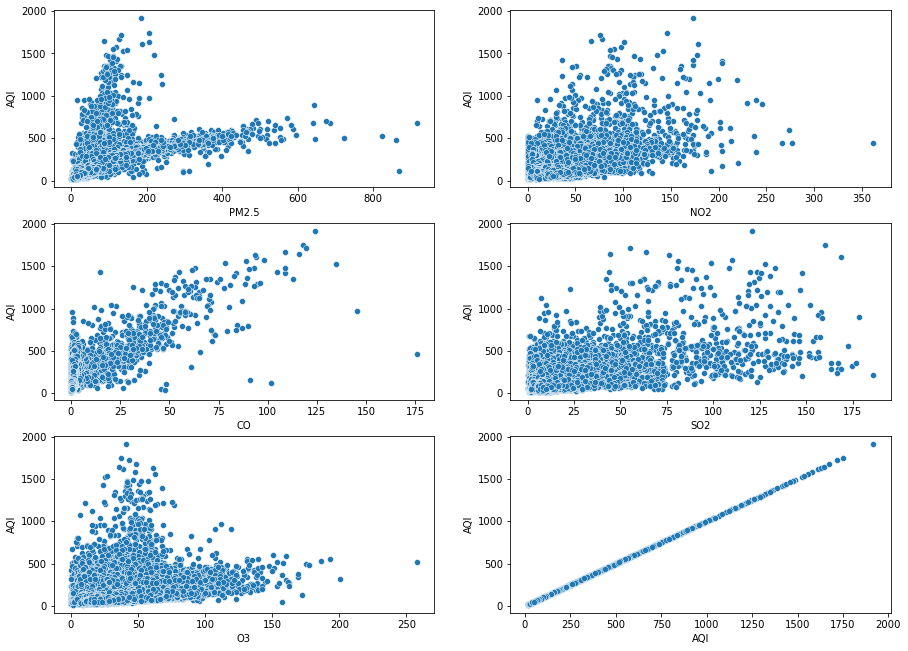

In [65]:
#Plotting Scatter Plot
plt.figure(figsize=(15,15))
for i in range(1,df.shape[1]+1):
    plt.subplot(4,2,i)
    sns.scatterplot(x=df[df.columns[i-1]],y=df.AQI)

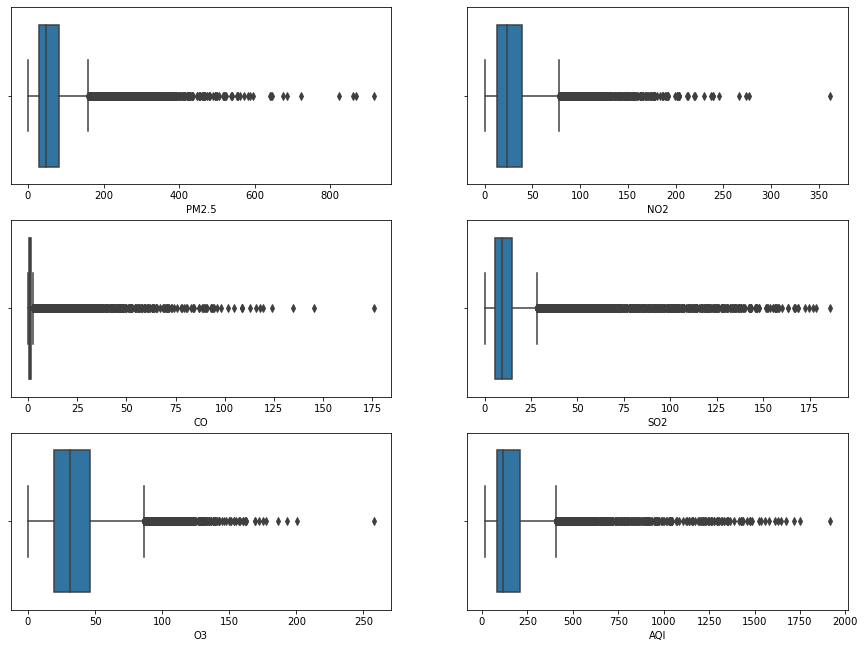

In [61]:
#Checking for Outliers
plt.figure(figsize=(15,15))
for i in range(1,df.shape[1]+1):
    plt.subplot(4,2,i)
    sns.boxplot(x=df[df.columns[i-1]])

In [64]:
df.describe()

,PM2.5,NO2,CO,SO2,O3,AQI
count,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000
mean,67.756028,29.718371,2.341847,13.891994,35.123085,167.385047
std,63.404533,24.503292,6.965907,16.661959,21.604953,140.384503
min,0.160000,0.010000,0.000000,0.010000,0.010000,14.000000
25%,29.032500,12.880000,0.610000,5.830000,19.560000,81.000000
50%,48.855000,23.220000,0.940000,9.220000,31.625000,118.000000
75%,81.340000,39.030000,1.470000,14.707500,46.250000,211.000000
max,914.940000,362.210000,175.810000,186.080000,257.730000,1917.000000


## Insights
- From above plot it is clear that data does not  follows normal distribution
- From Scatter plot it is clear that data is not in a linear  manner with respect to output feature
- Most of the R2 is too low to judge the parameters individually
- From Boxplot and Describe() method, we can conclude that Outlier exist and they can be impactful or cannot be based on the algorithm we will use.

# Feature Importance

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [74]:
print(model.feature_importances_)

[0.43579387 0.07366395 0.36080386 0.10253034 0.02720798]


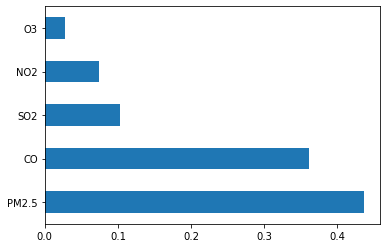

In [75]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Exporting Cleaned data for future use

In [71]:
df.to_csv("Data/final_data.csv", index=False)